# Ans of Ques 3

In [2]:
# Loading the dataset

In [3]:
from sklearn.datasets import load_diabetes

In [4]:
diabetics=load_diabetes()

In [5]:
print(diabetics.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
# Data pattern

In [7]:
print('Data shape', diabetics.data.shape)

Data shape (442, 10)


In [8]:
print('Target shape', diabetics.target.shape)

Target shape (442,)


In [9]:
# Attributes

In [10]:
print(diabetics.feature_names)


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [11]:
# Preprocessing 

In [12]:
import pandas as pd

In [ ]:
# Building data frame

In [13]:
DF= pd.DataFrame(diabetics.data, columns = diabetics.feature_names)
print(DF.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641  


In [ ]:
DF['db'] = diabetics.target

In [ ]:
pd.set_option('precision' ,4)
pd.set_option('max_columns' ,11)
pd.set_option('display.width' ,None)

In [44]:
DF

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,db
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.0417,0.0507,0.0197,0.0597,-0.0057,-0.0026,-0.0287,-0.0026,0.0312,0.0072,178.0
438,-0.0055,0.0507,-0.0159,-0.0676,0.0493,0.0792,-0.0287,0.0343,-0.0181,0.0445,104.0
439,0.0417,0.0507,-0.0159,0.0173,-0.0373,-0.0138,-0.0250,-0.0111,-0.0469,0.0155,132.0
440,-0.0455,-0.0446,0.0391,0.0012,0.0163,0.0153,-0.0287,0.0266,0.0445,-0.0259,220.0


In [45]:
# importing the necessary library

In [46]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn import metrics
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [47]:
# Visualize using heatmap

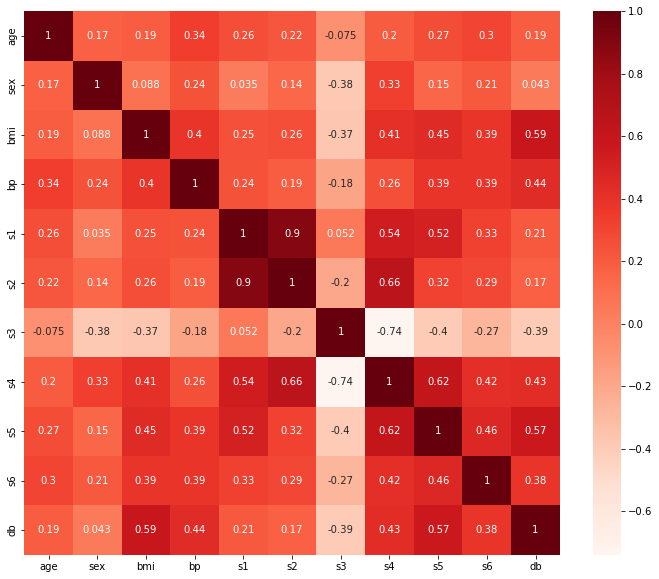

In [48]:
plt.figure(figsize=(12,10))
cor= DF.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [49]:
# Correlation amonge features

In [50]:
cor_target = abs(cor['db'])
print(cor_target)

age    0.1879
sex    0.0431
bmi    0.5865
bp     0.4415
s1     0.2120
s2     0.1741
s3     0.3948
s4     0.4305
s5     0.5659
s6     0.3825
db     1.0000
Name: db, dtype: float64


In [51]:
# Selection of best features ( Ans of 3 A)

In [76]:
selected_features= cor_target[cor_target > 0.5]
print('selected_features are: ', selected_features)

selected_features are:  bmi    0.5865
s5     0.5659
db     1.0000
Name: db, dtype: float64


In [53]:
# Correlation among the best features

In [77]:
print(DF[['bmi', 's5']].corr())


        bmi      s5
bmi  1.0000  0.4462
s5   0.4462  1.0000


In [78]:
# Data frame using the best features

In [111]:
selected_features=DF.loc[:,['bmi','s5', 'db']]
selected_features

,bmi,s5,db
0,0.0617,0.0199,151.0
1,-0.0515,-0.0683,75.0
2,0.0445,0.0029,141.0
3,-0.0116,0.0227,206.0
4,-0.0364,-0.0320,135.0
...,...,...,...
437,0.0197,0.0312,178.0
438,-0.0159,-0.0181,104.0
439,-0.0159,-0.0469,132.0
440,0.0391,0.0445,220.0


In [127]:
x=selected_features.drop(labels='db',axis=1)

In [114]:
x

,bmi,s5
0,0.0617,0.0199
1,-0.0515,-0.0683
2,0.0445,0.0029
3,-0.0116,0.0227
4,-0.0364,-0.0320
...,...,...
437,0.0197,0.0312
438,-0.0159,-0.0181
439,-0.0159,-0.0469
440,0.0391,0.0445


In [115]:
y=selected_features['db']
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: db, Length: 442, dtype: float64

In [ ]:
# Split of training and testing data

In [116]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, random_state=11)
print('x_train: ', x_train.shape)
print('y_train: ', y_train.shape)

x_train:  (331, 2)
y_train:  (331,)


In [ ]:
# Linear regrssion model

In [117]:
from sklearn.linear_model import LinearRegression
LR= LinearRegression()
LR.fit(X=x_train, y=y_train)
print(LR.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False}


In [118]:
print('Linear regression intercept = ', LR.intercept_)

Linear regression intercept =  151.61957072227057


In [121]:
print('Linear regression coef:\n')
for i, name in enumerate(selected_features.columns[0:2]):
      print(f'{name:>10}: {LR.coef_[i]}')

Linear regression coef:

       bmi: 648.1012220709013
        s5: 570.8999860989137


In [ ]:
# R2 Score

In [134]:
from sklearn import metrics
print('R2 score:', metrics.r2_score(predicted, expected))

R2 score: -0.39352004942529617


In [131]:
print('Training set score: ', LR.score(x_train, y_train))
print('Testing set score: ', LR.score(x_test, y_test))

Training set score:  0.4359169133990315
Testing set score:  0.5050385136203379


In [132]:
# Cross validation [c]
# Ridge and Lasso regression [D]

In [135]:
from sklearn.linear_model import Lasso, Ridge
estimators = {'Linear Regression': LR,
               'Lasso': Lasso(),
               'Ridge': Ridge()
              }

In [139]:
from sklearn.model_selection import cross_val_score
for estimator_name, estimator_object in estimators.items():
    fold = KFold(n_splits=10, shuffle=True, random_state=11)
    scores = cross_val_score(estimator = estimator_object, X=diabetics.data, y=diabetics.target, cv=fold, scoring='neg_mean_squared_error')
    print(f'{estimator_name:>17}: '  + f'Mean squared error={scores.mean():.3f}')

Linear Regression: Mean squared error=-3019.535
            Lasso: Mean squared error=-3864.197
            Ridge: Mean squared error=-3374.444
